# Initial exploration
The point of this notebook is to start to get a handle on the SIR model, including implementation in Python.

In [10]:
import numpy as np
from scipy.integrate import odeint

from matplotlib import pyplot as plt
%matplotlib inline

### SIR model overview
According to the [MAA site](https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model), the SIR model is defined as follows:

- $I(t) = $ number of **infected** individuals (people who are currently infected)
- $R(t) = $ number of **recovered** individuals (people who have recovered, and thus cannot catch it again)
- $S(t) = $ number of **susceptible** individuals (neither currently infected nor recovered)

In all cases $t$ is time, measured in days. Let $N$ be the population size, which is assumed to be unchanging (dead people are not removed from the population count, and no new im/emigration takes place). Then by definition

$$I(t) + R(t) + S(t) = N$$

or equivalently

$$\frac{I(t)}{N} + \frac{R(t)}{N} + \frac{S(t)}{N} = 1$$

In addition, define the following constants:

- $\beta = $ average number of people each infected person comes into contact with. We assume that every susceptible person who comes into contact with an infected person is immediately infected. 
- $\gamma = $ average *percentage* of infected people who recover each day (and thus move from $S(t)$ to $R(t)$)

Note the following:

1. The number of recovered people can only increase, and depends only on $I(t)$ and $\gamma$. In particular, a fraction $\gamma$ of the infected people will recover.
2. The number of susceptible people can only decrease (as they become infected), and depends only on $S(t)$ and $\beta$. Note that this can also be rephrased as $\frac{\beta}{N}\cdot I(t)S(t)$ of the population will become newly infected each day.

In particular, number 1 tells us that

$$ R'(t) = \gamma\cdot I(t)$$

Similarly, number 2 tells us that

$$ S'(t) = -\frac{\beta}{N}\cdot I(t)S(t)$$

Finally, the infected people each day are the newly infected ($-S'(t)$) minus the recovered ($R'(t)$). Thus

$$ I'(t) = -S'(t) - R'(t) = \frac{\beta}{N}\cdot I(t)S(t) - \gamma\cdot I(t) $$

Following the [Wikipedia page](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology) this can be solved for $S(t)$ in terms of the other functions, In particular,

$$ S(t) = S(0)\cdot \exp\Biggl(\displaystyle\frac{-\frac{\beta}{\gamma} \Bigl(R(t) - R(0)\Bigr)}{N}\Biggr) $$

Let's now try plotting this for various values of $\beta$ and $\gamma$.

## Setting up the system

### Initial conditions

In [48]:
beta = 2
gamma = 1/10

N = 1000
num_days = 200
t = np.linspace(0, num_days, num_days)

I0 = 1
R0 = 0
S0 = N - I0 - R0

y0 = (S0, I0, R0)

In [49]:
def diff_system(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta/N * I * S
    dIdt = beta/N * S * I - gamma * I 
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

### Solving the system

In [50]:
soln = odeint(diff_system, y0, t, args=(N, beta, gamma))

In [51]:
S, I, R = soln.T

### Plotting the solution

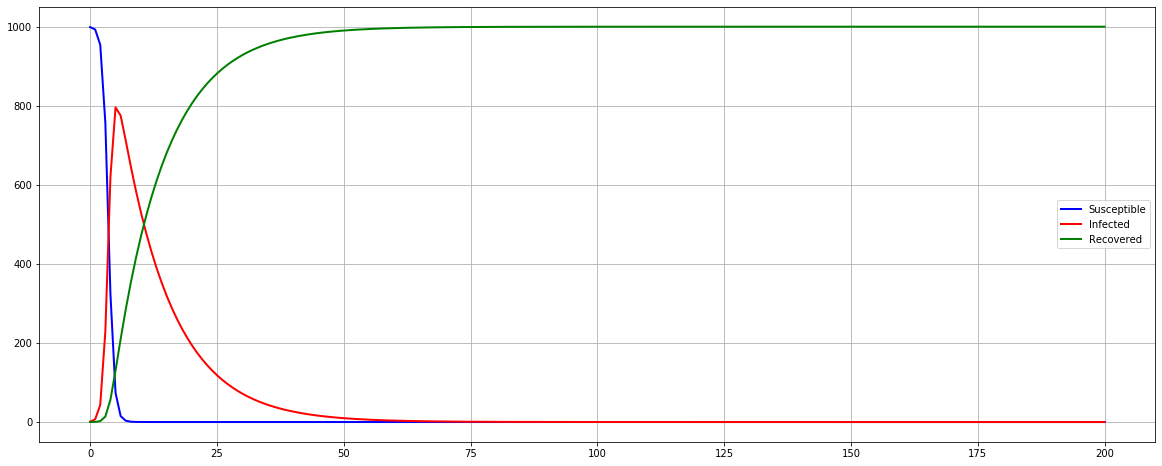

In [52]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(t, S, 'b', lw=2, label='Susceptible')
ax.plot(t, I, 'r', lw=2, label='Infected')
ax.plot(t, R, 'g', lw=2, label='Recovered')
plt.legend()
plt.grid()